# Analysis of Menu of McDonald's India

By *Aniruddha Mandal*

Dataset Link: https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts

We perform an exhaustive exploratory analysis of nutrition data and get the healthiest food.

# Data Ingestion

In [1]:
import pandas as pd

data = pd.read_csv('../input/mcdonalds-india-menu-nutrition-facts/India_Menu.csv')
data.head(10)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22
6,Regular Menu,Green Chilli Aloo Naan,132 g,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60
7,Regular Menu,Pizza Puff,87 g,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74
8,Regular Menu,Mc chicken Burger,173 g,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33
9,Regular Menu,FILLET-O-FISH Burger,136 g,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


# Data Cleaning

In [3]:
data[:6]

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,306 g,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22


In [4]:
data[data.isnull().any(axis=1)]


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228 g,443.4,25.63,17.3,4.01,0.19,64.19,43.29,9.29,6.32,NaN


Replacing the null value from https://www.mcdelivery.co.in/assets/pdf/McD_Allergen_and_Nutritional_Table.pdf

In [5]:
data['Sodium (mg)'].iloc[[111]] = 1229.86

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [6]:
data.isna().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)               False
dtype: bool

Removing the unit in **Per Serve Size** column values and casting it to a floating integer

In [7]:
data['Per Serve Size'] = [float(x.split()[0]) for x in data['Per Serve Size']]

## Menu Category and number of items each category contains

In [8]:
data.groupby('Menu Category').count()[['Menu Items']]

,Menu Items
Menu Category,
Beverages Menu,17
Breakfast Menu,15
Condiments Menu,9
Desserts Menu,2
Gourmet Menu,11
McCafe Menu,51
Regular Menu,36


<AxesSubplot:xlabel='Menu Category', ylabel='Number of food items'>

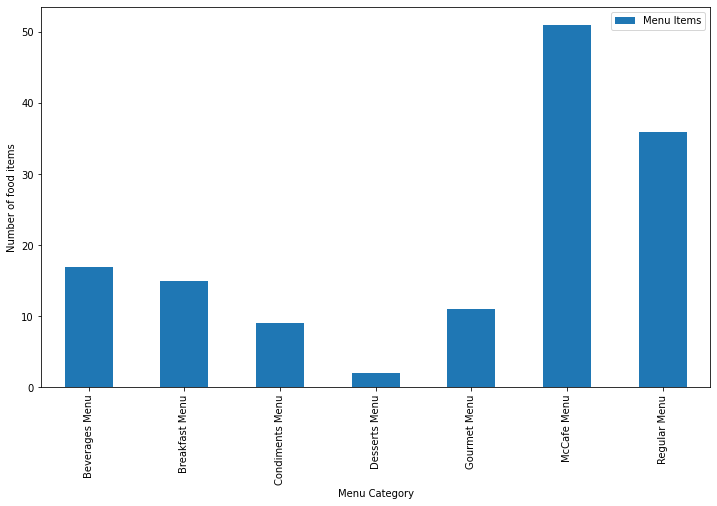

In [9]:
data.groupby('Menu Category').count()[['Menu Items']].plot(figsize=(12,7), kind='bar', ylabel='Number of food items')

**McCafe Menu** has the most number of items, while **Desserts Menu** has the least number of items

# Trans Fat

In [10]:
data.groupby('Menu Category').mean()[['Trans fat (g)']].sort_values('Trans fat (g)')

,Trans fat (g)
Menu Category,
Beverages Menu,0.008824
Condiments Menu,0.067778
Desserts Menu,0.095000
Breakfast Menu,0.146000
Gourmet Menu,0.194545
McCafe Menu,0.219804
Regular Menu,2.233333


<AxesSubplot:xlabel='Menu Category', ylabel='Trans fat (g)'>

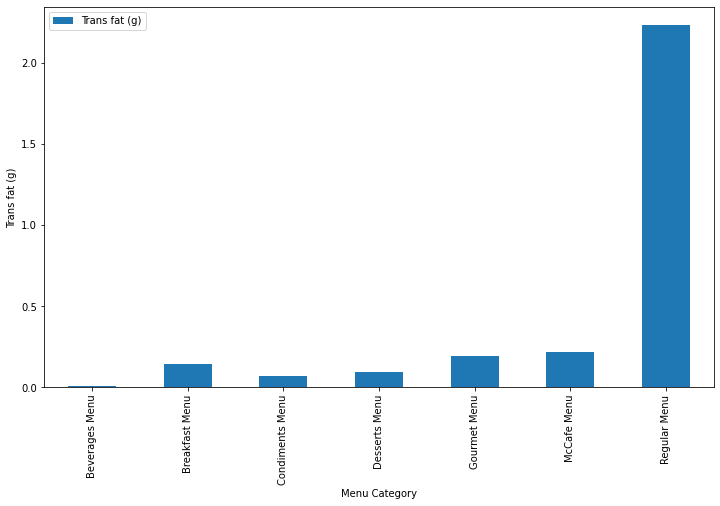

In [11]:
data.groupby('Menu Category').mean()[['Trans fat (g)']].plot(figsize=(12,7), kind='bar', ylabel='Trans fat (g)')

**Regular Menu** category of menu has the most amount of trans-fat

In [12]:
data[['Menu Category', 'Menu Items', 'Trans fat (g)']].sort_values(['Trans fat (g)'], ascending=False).head()

,Menu Category,Menu Items,Trans fat (g)
25,Regular Menu,5 piece Chicken Strips,75.26
132,Condiments Menu,Mustard diping sauce,0.47
75,McCafe Menu,Strawberry Green Tea (L),0.46
72,McCafe Menu,Moroccon Mint Green Tea (L),0.46
69,McCafe Menu,English Breakfast (L),0.46


Top five foods having high levels of trans-fat: 

+ 5 piece Chicken Strips
+ Mustard diping sauce
+ Strawberry Green Tea (L)
+ Moroccon Mint Green Tea (L)
+ English Breakfast (L)

In [13]:
trans_fat_desc = data[['Menu Category', 'Menu Items', 'Trans fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Trans fat (g)', ascending=False).head(5))
trans_fat_desc

,Menu Category,Menu Items,Trans fat (g)
129,Beverages Menu,Sprite Float,0.05
128,Beverages Menu,Fanta Float,0.05
127,Beverages Menu,Coke Float,0.05
115,Beverages Menu,Small Coca-Cola,0.00
124,Beverages Menu,Small Sprite,0.00
42,Breakfast Menu,Hot Cake with maple syrup,0.32
50,Breakfast Menu,Cappuccino (R),0.30
40,Breakfast Menu,Sausage Mc Muffin with egg,0.22
37,Breakfast Menu,Double Cheese McMuffin,0.21
49,Breakfast Menu,Cappuccino (S),0.20


The top 5 food items having most trans-fat (g) of each menu category are:

**Beverages Menu**:
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Hot Cake with maple syrup
+ Cappuccino (R)
+ Sausage Mc Muffin with egg
+ Double Cheese McMuffin
+ Cappuccino (S)

**Condiments Menu**:
+ Mustard diping sauce
+ BBQ diping sauce
+ Sweet Corn
+ Mixed Fruit Beverage
+ Chilli Sauce

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chicken Cheese Lava Burger
+ Chunky Chipotle American Burger Chicken
+ McSpicy Premium Chicken Burger
+ Cheese Lava Burger
+ McSpicy Premium Veg Burger

**McCafe Menu**:
+ Strawberry Green Tea (L)
+ Moroccon Mint Green Tea (L)
+ English Breakfast (L)	
+ Hot Chocolate (L)
+ Mocha (L)
  
**Regular Menu**:
+ 5 piece Chicken Strips	
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ Veg Maharaja Mac
+ Spicy Chicken Wrap
+ Spicy Paneer Wrap	

From the above observations, we can notice that:
+ Only "Float" have trans-fat in the **Beverages Menu**

In [14]:
trans_fat_asc = data[['Menu Category', 'Menu Items', 'Trans fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Trans fat (g)', ascending=True).head(5))
trans_fat_asc

,Menu Category,Menu Items,Trans fat (g)
115,Beverages Menu,Small Coca-Cola,0.00
126,Beverages Menu,Large Sprite,0.00
125,Beverages Menu,Medium Sprite,0.00
124,Beverages Menu,Small Sprite,0.00
130,Beverages Menu,Coke Zero Can,0.00
44,Breakfast Menu,Espresso,0.03
46,Breakfast Menu,Americano (S),0.03
47,Breakfast Menu,Americano (R),0.05
43,Breakfast Menu,Hash Brown,0.06
48,Breakfast Menu,Americano (L),0.06


The top 5 food items having least trans-fat (g) of each menu category are:

**Beverages Menu**:
+ All except Sprite Float, Fanta Float, Coke Float

**Breakfast Menu**:
+ Espresso
+ Americano (S)
+ Americano (R)	
+ Hash Brown
+ Americano (L)

**Condiments Menu**:
+ Maple Syrup
+ Chilli Sauce
+ Piri Piri Mix
+ Tomato Ketchup Sachets	
+ Cheese Slice

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)	
+ Cheesy Veg Nuggets (9pc)
+ American Triple Cheese Chicken
+ Piri piri Mc Spicy Veg Burger
+ American Triple Cheese Veg	

**McCafe Menu**:
+ Sweet Lime Beverage
+ Mix Berry Cooler
+ Raw Mango Cooler
+ Soft serve cone
+ Regular Soft Serve: Strawberry
  
**Regular Menu**:
+ L1 Coffee
+ 2 piece Chicken Strips
+ 4 piece Chicken McNuggets
+ McSpicy Fried Chicken 1 pc	
+ Vanilla Chocochips Muffin	


# Energy (kCal)

In [15]:
data[['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)']].sort_values(['Per Serve Size'], ascending=False).head(5)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal)
120,Beverages Menu,Large Fanta Oragne,544.0,256.88
123,Beverages Menu,Large Thums-up,544.0,197.60
117,Beverages Menu,Large Coca-Cola,544.0,217.36
126,Beverages Menu,Large Sprite,544.0,237.12
131,Beverages Menu,Vedica Natural Mineral Water,500.0,0.00


<AxesSubplot:xlabel='Menu Category', ylabel='mean value'>

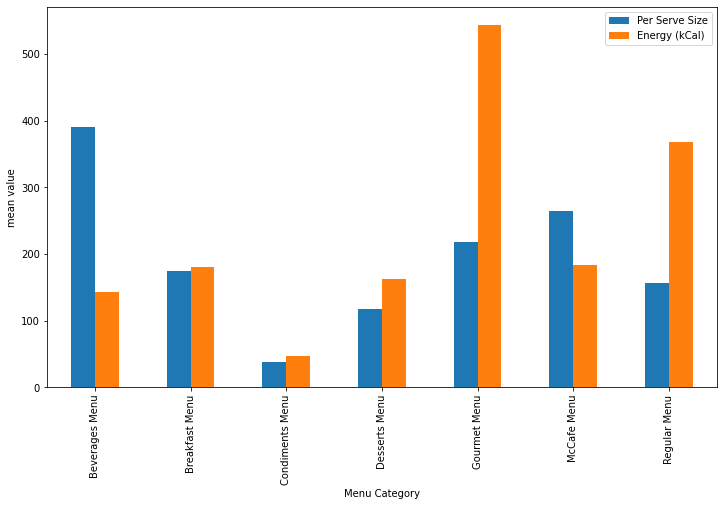

In [16]:
data[['Menu Category','Per Serve Size', 'Energy (kCal)']].groupby('Menu Category').mean().plot(figsize=(12,7), kind='bar', ylabel='mean value')

From the above observation, we can say that:

+ Gourmet Menu has the most Energy (kCal) per serving size (g or ml)
+ Beverages Menu has the least Energy (kCal) per serving size (g or ml) [*and it is expected*]
+ Regular Menu has the second least Energy (kCal) per serving size (g or ml)

It is therefore, better to say that foods of Regular Menu are not healthy.

In [17]:
data[['Menu Category', 'Menu Items', 'Energy (kCal)']].sort_values('Energy (kCal)', ascending=False).head()

,Menu Category,Menu Items,Energy (kCal)
107,Gourmet Menu,Chicken Cheese Lava Burger,834.36
5,Regular Menu,Veg Maharaja Mac,832.67
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,720.30
12,Regular Menu,Chicken Maharaja Mac,689.12
3,Regular Menu,Spicy Paneer Wrap,674.68


The top 5 foods having the most **Energy (kCal)** are:
+ Chicken Cheese Lava Burger
+ Veg Maharaja Mac
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ Chicken Maharaja Mac
+ Spicy Paneer Wrap

In [18]:
energy_desc = data[['Menu Category', 'Menu Items', 'Energy (kCal)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Energy (kCal)', ascending=False).head(5))
energy_desc

,Menu Category,Menu Items,Energy (kCal)
120,Beverages Menu,Large Fanta Oragne,256.88
126,Beverages Menu,Large Sprite,237.12
117,Beverages Menu,Large Coca-Cola,217.36
123,Beverages Menu,Large Thums-up,197.60
119,Beverages Menu,Medium Fanta Orange,178.88
42,Breakfast Menu,Hot Cake with maple syrup,432.98
36,Breakfast Menu,Veg McMuffin,309.35
40,Breakfast Menu,Sausage Mc Muffin with egg,290.42
41,Breakfast Menu,Egg McMuffin,283.46
39,Breakfast Menu,Sausage Mc Muffin,281.44


The top 5 food items having most Energy (kCal) of each menu category are:

**Beverages Menu**:
+ Large Fanta Oragne
+ Large Sprite
+ Large Coca-Cola
+ Large Thums-up
+ Medium Fanta Orange

**Breakfast Menu**:
+ Hot Cake with maple syrup
+ Veg McMuffin
+ Sausage Mc Muffin with egg
+ Egg McMuffin
+ Sausage Mc Muffin

**Condiments Menu**:
+ Maple Syrup
+ Mustard diping sauce	
+ Mixed Fruit Beverage
+ BBQ diping sauce	
+ Cheese Slice

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chicken Cheese Lava Burger
+ Cheese Lava Burger
+ Chunky Chipotle American Burger Chicken
+ McSpicy Premium Veg Burger
+ McSpicy Premium Chicken Burger

**McCafe Menu**:
+ Chocolate Oreo Frappe	
+ Medium Blackforest
+ American Mud Pie Shake
+ Mocha Frappe
+ Hot Chocolate (L)	
  
**Regular Menu**:
+ Veg Maharaja Mac	
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ Chicken Maharaja Mac
+ Spicy Paneer Wrap	
+ McSpicy™ Paneer Burger


In [19]:
energy_asc = data[['Menu Category', 'Menu Items', 'Energy (kCal)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Energy (kCal)', ascending=True).head(5))
energy_asc

,Menu Category,Menu Items,Energy (kCal)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.99
121,Beverages Menu,Small Thums-up,99.60
115,Beverages Menu,Small Coca-Cola,109.56
124,Beverages Menu,Small Sprite,119.52
44,Breakfast Menu,Espresso,12.87
46,Breakfast Menu,Americano (S),12.87
47,Breakfast Menu,Americano (R),23.07
48,Breakfast Menu,Americano (L),26.71
45,Breakfast Menu,Espresso Machiato,44.98


The top 5 food items having least Energy (kCal) of each menu category are:

**Beverages Menu**:
+ Vedica Natural Mineral Water
+ Coke Zero Can
+ Small Thums-up
+ Small Coca-Cola
+ Small Sprite

**Breakfast Menu**:
+ Espresso
+ Americano (S)
+ Americano (R)	
+ Americano (L)
+ Espresso Machiato

**Condiments Menu**:
+ Chilli Sauce
+ Tomato Ketchup Sachets
+ Piri Piri Mix
+ Sweet Corn	
+ Cheese Slice

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)
+ Cheesy Veg Nuggets (9pc)
+ Piri piri Mc Spicy Chicken Burger
+ American Triple Cheese Chicken	
+ Piri piri Mc Spicy Veg Burger

**McCafe Menu**:
+ Moroccon Mint Green Tea (S)
+ Strawberry Green Tea (S)
+ Moroccon Mint Green Tea (R)	
+ Strawberry Green Tea (R)	
+ English Breakfast (S)	
  
**Regular Menu**:
+ L1 Coffee	
+ L1 Coffee with milk
+ 2 piece Chicken Strips
+ 4 piece Chicken McNuggets	
+ Regular Wedges


# Proteins

In [20]:
data[['Menu Category', 'Menu Items', 'Protein (g)']].sort_values(['Protein (g)'], ascending=False).head()

,Menu Category,Menu Items,Protein (g)
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,39.47
12,Regular Menu,Chicken Maharaja Mac,34.00
109,Gourmet Menu,McSpicy Premium Chicken Burger,31.49
107,Gourmet Menu,Chicken Cheese Lava Burger,27.37
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,26.91


The top 5 foods having the most proteins:
+ Chunky Chipotle American Burger Chicken
+ Chicken Maharaja Mac
+ McSpicy Premium Chicken Burger
+ Chicken Cheese Lava Burger
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc

<AxesSubplot:xlabel='Menu Category', ylabel='Protein (g)'>

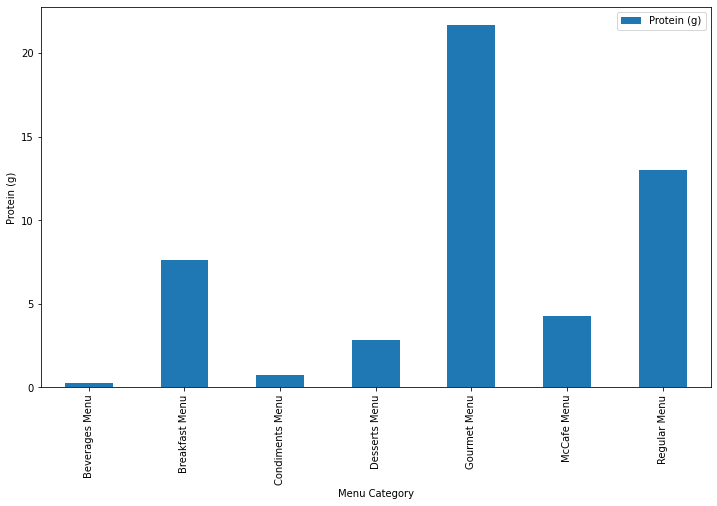

In [21]:
data.groupby('Menu Category').mean()[['Protein (g)']].plot(figsize=(12,7), kind='bar', ylabel='Protein (g)')

From the above observation, we can say that:
**Gourmet Menu** has the most amount of protein, followed by **Regular Menu** and **Breakfast Menu**

In [22]:
protein_asc = data[['Menu Category', 'Menu Items', 'Protein (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Protein (g)', ascending=True).head(5))
protein_asc

,Menu Category,Menu Items,Protein (g)
115,Beverages Menu,Small Coca-Cola,0.00
126,Beverages Menu,Large Sprite,0.00
125,Beverages Menu,Medium Sprite,0.00
124,Beverages Menu,Small Sprite,0.00
130,Beverages Menu,Coke Zero Can,0.00
44,Breakfast Menu,Espresso,0.52
46,Breakfast Menu,Americano (S),0.52
47,Breakfast Menu,Americano (R),0.94
48,Breakfast Menu,Americano (L),1.09
43,Breakfast Menu,Hash Brown,1.93


The top 5 food items having least Protein (g) of each menu category are:

**Beverages Menu**:
+ Sprite Float	
+ Fanta Float
+ Coke Float	

**Breakfast Menu**:
+ Espresso
+ Americano (S)
+ Americano (R)	
+ Americano (L)
+ Hash Brown

**Condiments Menu**:
+ Maple Syrup
+ Chilli Sauce
+ Tomato Ketchup Sachets	
+ BBQ diping sauce	
+ Piri Piri Mix

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)
+ Piri piri Mc Spicy Veg Burger
+ Cheesy Veg Nuggets (9pc)
+ Cheese Lava Burger	
+ American Triple Cheese Veg

**McCafe Menu**:
+ Sweet Lime Beverage
+ Raw Mango Cooler
+ Mix Berry Cooler	
+ Green Apple Ice Tea
+ Strawberry Ice Tea
  
**Regular Menu**:
+ L1 Coffee
+ L1 Coffee with milk
+ Regular Fries
+ Regular Wedges	
+ Vanilla Chocochips Muffin

In [23]:
protein_desc = data[['Menu Category', 'Menu Items', 'Protein (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Protein (g)', ascending=False).head(5))
protein_desc

,Menu Category,Menu Items,Protein (g)
129,Beverages Menu,Sprite Float,1.52
128,Beverages Menu,Fanta Float,1.52
127,Beverages Menu,Coke Float,1.52
115,Beverages Menu,Small Coca-Cola,0.00
124,Beverages Menu,Small Sprite,0.00
40,Breakfast Menu,Sausage Mc Muffin with egg,22.46
39,Breakfast Menu,Sausage Mc Muffin,16.25
41,Breakfast Menu,Egg McMuffin,14.05
38,Breakfast Menu,Spicy Egg McMuffin,11.49
36,Breakfast Menu,Veg McMuffin,10.22


The top 5 food items having most Protein (g) of each menu category are:

**Beverages Menu**:
+ Sprite Float	
+ Fanta Float
+ Coke Float	

**Breakfast Menu**:
+ Sausage Mc Muffin with egg
+ Sausage Mc Muffin
+ Egg McMuffin
+ Spicy Egg McMuffin
+ Veg McMuffin

**Condiments Menu**:
+ Cheese Slice
+ Sweet Corn
+ Mixed Fruit Beverage
+ Mustard diping sauce	
+ Piri Piri Mix

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chunky Chipotle American Burger Chicken
+ McSpicy Premium Chicken Burger
+ Chicken Cheese Lava Burger
+ Piri piri Mc Spicy Chicken Burger	
+ American Triple Cheese Chicken

**McCafe Menu**:
+ Flat White (L)
+ Latte (L)
+ Hot Chocolate (L)	
+ Mocha (L)
+ Cappuccino (L)
  
**Regular Menu**:
+ Chicken Maharaja Mac
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ 5 piece Chicken Strips
+ Veg Maharaja Mac		
+ Spicy Chicken Wrap

# Total Fat

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Total fat (g)'>

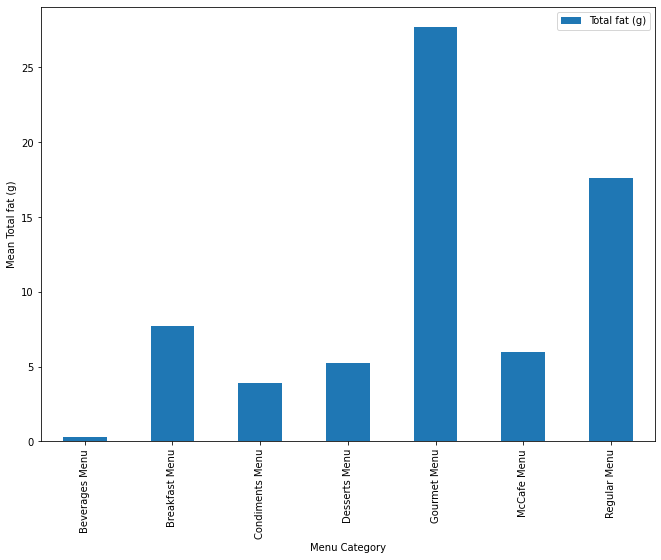

In [24]:
data[['Menu Category', 'Menu Items', 'Total fat (g)']].groupby('Menu Category').mean().plot(figsize=(11,8),ylabel='Mean Total fat (g)', kind='bar')

From the above observation, we can see that **Gourmet Menu** has the most *total fat (g)*, followed by **Regular Menu**

In [25]:
data[['Menu Category', 'Menu Items', 'Total fat (g)']].sort_values('Total fat (g)', ascending=False).head()

,Menu Category,Menu Items,Total fat (g)
107,Gourmet Menu,Chicken Cheese Lava Burger,45.18
2,Regular Menu,McSpicy™ Paneer Burger,39.45
110,Gourmet Menu,McSpicy Premium Veg Burger,39.21
3,Regular Menu,Spicy Paneer Wrap,39.10
5,Regular Menu,Veg Maharaja Mac,37.94


The top 5 foods having the most total fat (g) are:
+ Chicken Cheese Lava Burger
+ McSpicy™ Paneer Burger
+ McSpicy Premium Veg Burger
+ Spicy Paneer Wrap
+ Veg Maharaja Mac

In [26]:
data[['Menu Category', 'Menu Items', 'Total fat (g)']].sort_values('Total fat (g)', ascending=True)[data['Total fat (g)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Total fat (g)
134,Condiments Menu,Chilli Sauce,0.01
140,Condiments Menu,Mixed Fruit Beverage,0.02
44,Breakfast Menu,Espresso,0.03
46,Breakfast Menu,Americano (S),0.03
88,McCafe Menu,Mix Berry Cooler,0.04


The top 5 foods having the least total fat (g) are:
+ Chilli Sauce
+ Mixed Fruit Beverage
+ Espresso
+ Americano (S)
+ Mix Berry Cooler

All beverages except "Floats" have 0g of total fat

In [27]:
total_fat_asc = data[['Menu Category', 'Menu Items', 'Total fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total fat (g)', ascending=True).head(5))
total_fat_asc

,Menu Category,Menu Items,Total fat (g)
115,Beverages Menu,Small Coca-Cola,0.00
126,Beverages Menu,Large Sprite,0.00
125,Beverages Menu,Medium Sprite,0.00
124,Beverages Menu,Small Sprite,0.00
130,Beverages Menu,Coke Zero Can,0.00
44,Breakfast Menu,Espresso,0.03
46,Breakfast Menu,Americano (S),0.03
47,Breakfast Menu,Americano (R),0.05
48,Breakfast Menu,Americano (L),0.06
45,Breakfast Menu,Espresso Machiato,2.02


The top 5 food items having least Total fat (g) of each menu category are:

**Beverages Menu**:
+ All beverages except "Floats" have 0g of total fat

**Breakfast Menu**:
+ Espresso
+ Americano (S)	
+ Americano (R)
+ Americano (L)	
+ Espresso Machiato

**Condiments Menu**:
+ Maple Syrup
+ Chilli Sauce
+ Mixed Fruit Beverage
+ Piri Piri Mix
+ BBQ diping sauce

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)
+ Piri piri Mc Spicy Chicken Burger
+ Cheesy Veg Nuggets (9pc)	
+ American Triple Cheese Chicken	
+ American Triple Cheese Veg

**McCafe Menu**:
+ Mix Berry Cooler
+ Raw Mango Cooler
+ Sweet Lime Beverage	
+ Green Apple Ice Tea
+ Strawberry Ice Tea
  
**Regular Menu**:
+ L1 Coffee
+ L1 Coffee with milk	
+ Regular Wedges
+ Green Chilli Kebab naan	
+ 4 piece Chicken McNuggets

In [28]:
total_fat_desc = data[['Menu Category', 'Menu Items', 'Total fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total fat (g)', ascending=False).head(5))
total_fat_desc

,Menu Category,Menu Items,Total fat (g)
129,Beverages Menu,Sprite Float,1.75
128,Beverages Menu,Fanta Float,1.75
127,Beverages Menu,Coke Float,1.75
115,Beverages Menu,Small Coca-Cola,0.00
124,Beverages Menu,Small Sprite,0.00
40,Breakfast Menu,Sausage Mc Muffin with egg,15.94
42,Breakfast Menu,Hot Cake with maple syrup,14.02
37,Breakfast Menu,Double Cheese McMuffin,12.82
41,Breakfast Menu,Egg McMuffin,12.31
38,Breakfast Menu,Spicy Egg McMuffin,11.81


The top 5 food items having most Total fat (g) of each menu category are:

**Beverages Menu**:
+ All beverages except "Floats" have 0g of total fat
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Sausage Mc Muffin with egg
+ Hot Cake with maple syrup
+ Double Cheese McMuffin
+ Egg McMuffin
+ Spicy Egg McMuffin

**Condiments Menu**:
+ Tomato Ketchup Sachets
+ Mustard diping sauce
+ Cheese Slice
+ Sweet Corn
+ BBQ diping sauce

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chicken Cheese Lava Burger	
+ McSpicy Premium Veg Burger
+ McSpicy Premium Chicken Burger	
+ Cheese Lava Burger	
+ Chunky Chipotle American Burger Chicken

**McCafe Menu**:
+ Chocolate Oreo Frappe
+ Mocha Frappe
+ Cold Coffee Frappe
+ Flat White (L)	
+ Hot Chocolate (L)	
  
**Regular Menu**:
+ McSpicy™ Paneer Burger
+ Spicy Paneer Wrap
+ Veg Maharaja Mac
+ Chicken Maharaja Mac
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc

# Cholesterol

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Cholesterols (mg)'>

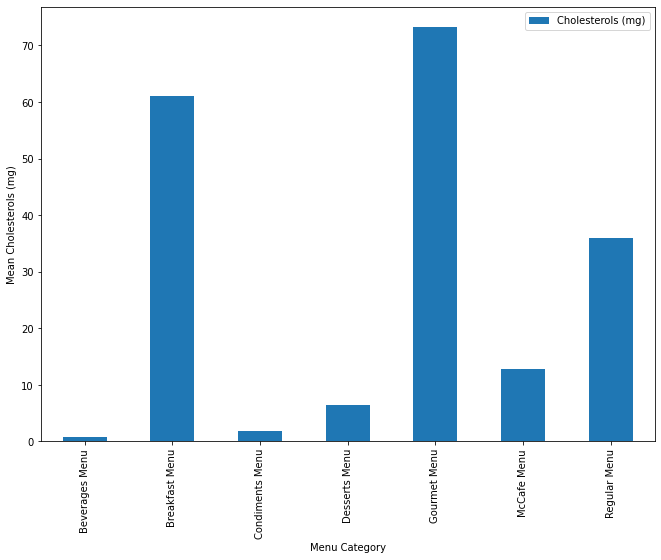

In [29]:
data[['Menu Category','Menu Items', 'Cholesterols (mg)']].groupby('Menu Category').mean().plot(figsize=(11,8), ylabel='Mean Cholesterols (mg)', kind='bar')

From the above observations, we can see that **Gourmet Menu** has the most cholesterols (mg), followed by **Breakfast Menu**.

In [30]:
data[['Menu Category','Menu Items', 'Cholesterols (mg)']].sort_values('Cholesterols (mg)', ascending=False).head()

,Menu Category,Menu Items,Cholesterols (mg)
109,Gourmet Menu,McSpicy Premium Chicken Burger,302.61
40,Breakfast Menu,Sausage Mc Muffin with egg,264.80
41,Breakfast Menu,Egg McMuffin,233.30
16,Regular Menu,Mc Egg Masala Burger,213.09
17,Regular Menu,Mc Egg Burger for Happy Meal,213.09


The top 5 foods having the most Cholesterols (mg) are:
+ McSpicy Premium Chicken Burger
+ Sausage Mc Muffin with egg
+ Egg McMuffin
+ Mc Egg Masala Burger
+ Mc Egg Burger for Happy Meal

In [31]:
data[['Menu Category','Menu Items', 'Cholesterols (mg)']].sort_values('Cholesterols (mg)', ascending=True)[data['Cholesterols (mg)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Cholesterols (mg)
140,Condiments Menu,Mixed Fruit Beverage,0.01
135,Condiments Menu,Piri Piri Mix,0.05
136,Condiments Menu,Tomato Ketchup Sachets,0.08
134,Condiments Menu,Chilli Sauce,0.10
133,Condiments Menu,BBQ diping sauce,0.25


The top 5 foods having the least Cholesterols (mg) are:
+ Mixed Fruit Beverage
+ Piri Piri Mix
+ Tomato Ketchup Sachets
+ Chilli Sauce
+ BBQ diping sauce

In [32]:
chol_desc = data[['Menu Category', 'Menu Items', 'Cholesterols (mg)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Cholesterols (mg)', ascending=False).head(5))
chol_desc

,Menu Category,Menu Items,Cholesterols (mg)
129,Beverages Menu,Sprite Float,4.70
128,Beverages Menu,Fanta Float,4.70
127,Beverages Menu,Coke Float,4.70
115,Beverages Menu,Small Coca-Cola,0.00
124,Beverages Menu,Small Sprite,0.00
40,Breakfast Menu,Sausage Mc Muffin with egg,264.80
41,Breakfast Menu,Egg McMuffin,233.30
38,Breakfast Menu,Spicy Egg McMuffin,212.61
39,Breakfast Menu,Sausage Mc Muffin,53.02
37,Breakfast Menu,Double Cheese McMuffin,37.75


The top 5 food items having most Cholesterols (mg) of each menu category are:

**Beverages Menu**:
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Sausage Mc Muffin with egg
+ Egg McMuffin
+ Spicy Egg McMuffin
+ Sausage Mc Muffin
+ Double Cheese McMuffin

**Condiments Menu**:
+ Cheese Slice
+ Sweet Corn
+ Maple Syrup
+ Mustard diping sauce
+ BBQ diping sauce

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ McSpicy Premium Chicken Burger	
+ Chunky Chipotle American Burger Chicken
+ Chicken Cheese Lava Burger	
+ American Triple Cheese Chicken	
+ Piri piri Mc Spicy Chicken Burger

**McCafe Menu**:
+ Flat White (L)	
+ Latte (L)
+ Hot Chocolate (L)
+ Cappuccino (L)	
+ Flat White (R)
  
**Regular Menu**:
+ Mc Egg Burger for Happy Meal
+ Mc Egg Masala Burger	
+ Spicy Chicken Wrap
+ Chicken Maharaja Mac
+ Vanilla Chocochips Muffin

In [33]:
chol_asc = data[['Menu Category', 'Menu Items', 'Cholesterols (mg)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Cholesterols (mg)', ascending=True).head(5))
chol_asc

,Menu Category,Menu Items,Cholesterols (mg)
115,Beverages Menu,Small Coca-Cola,0.00
126,Beverages Menu,Large Sprite,0.00
125,Beverages Menu,Medium Sprite,0.00
124,Beverages Menu,Small Sprite,0.00
130,Beverages Menu,Coke Zero Can,0.00
44,Breakfast Menu,Espresso,0.27
46,Breakfast Menu,Americano (S),0.27
47,Breakfast Menu,Americano (R),0.48
48,Breakfast Menu,Americano (L),0.55
43,Breakfast Menu,Hash Brown,0.64


The top 5 food items having most Cholesterols (mg) of each menu category are:

**Beverages Menu**:
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Espresso
+ Americano (S)
+ Americano (R)
+ Americano (L)
+ Espresso Machiato

**Condiments Menu**:
+ Maple Syrup
+ Chilli Sauce
+ Mixed Fruit Beverage
+ Piri Piri Mix
+ BBQ diping sauce

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)	
+ Piri piri Mc Spicy Chicken Burger	
+ Cheesy Veg Nuggets (9pc)	
+ American Triple Cheese Chicken	
+ American Triple Cheese Veg

**McCafe Menu**:
+ Mix Berry Cooler	
+ Raw Mango Cooler
+ Sweet Lime Beverage
+ Green Apple Ice Tea	
+ Strawberry Ice Tea
  
**Regular Menu**:
+ L1 Coffee
+ L1 Coffee with milk	
+ Regular Wedges
+ Green Chilli Kebab naan
+ 4 piece Chicken McNuggets

# Total carbohydrates

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Total Carbohydrates (mg)'>

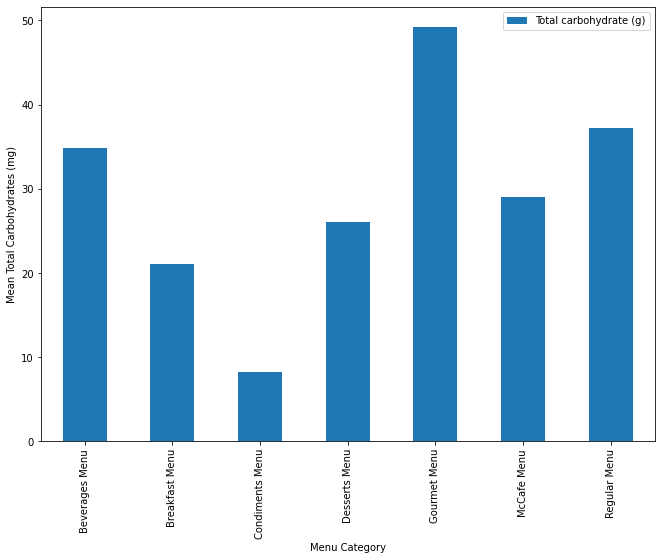

In [34]:
data[['Menu Category','Menu Items', 'Total carbohydrate (g)']].groupby('Menu Category').mean().plot(figsize=(11,8), ylabel='Mean Total Carbohydrates (mg)', kind='bar')

From the above observations, we can see that **Gourmet Menu** has the most Total carbohydrate (g), followed by **Regular Menu**.

In [35]:
data[['Menu Category', 'Menu Items', 'Total carbohydrate (g)']].sort_values('Total carbohydrate (g)', ascending=False).head()

,Menu Category,Menu Items,Total carbohydrate (g)
5,Regular Menu,Veg Maharaja Mac,93.84
101,McCafe Menu,Medium Blackforest,79.04
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,77.47
107,Gourmet Menu,Chicken Cheese Lava Burger,76.03
106,Gourmet Menu,Cheese Lava Burger,74.25


The top 5 food items having the most total carbohydrate (g) are:
+ Veg Maharaja Mac
+ Medium Blackforest
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ Chicken Cheese Lava Burger
+ Cheese Lava Burger

In [36]:
data[['Menu Category','Menu Items', 'Total carbohydrate (g)']].sort_values('Total carbohydrate (g)', ascending=True)[data['Total carbohydrate (g)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Total carbohydrate (g)
67,McCafe Menu,English Breakfast (S),0.28
68,McCafe Menu,English Breakfast (R),0.33
69,McCafe Menu,English Breakfast (L),0.46
138,Condiments Menu,Cheese Slice,0.72
25,Regular Menu,5 piece Chicken Strips,0.73


The top 5 food items having the least total carbohydrate (g) are:
+ English Breakfast (S)
+ English Breakfast (R)	
+ English Breakfast (L)
+ Cheese Slice
+ 5 piece Chicken Strips

In [37]:
carbs_asc = data[['Menu Category', 'Menu Items', 'Total carbohydrate (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total carbohydrate (g)', ascending=True).head(5))
carbs_asc

,Menu Category,Menu Items,Total carbohydrate (g)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.00
121,Beverages Menu,Small Thums-up,24.90
115,Beverages Menu,Small Coca-Cola,27.39
127,Beverages Menu,Coke Float,29.22
44,Breakfast Menu,Espresso,2.55
46,Breakfast Menu,Americano (S),2.55
47,Breakfast Menu,Americano (R),4.57
45,Breakfast Menu,Espresso Machiato,4.97
48,Breakfast Menu,Americano (L),5.30


The top 5 food items having least Total carbohydrate (g) of each menu category are:

**Beverages Menu**:
+ Small Thums-up
+ Small Coca-Cola
+ Coke Float

**Breakfast Menu**:
+ Espresso
+ Americano (S)
+ Americano (R)
+ Espresso Machiato
+ Americano (L)

**Condiments Menu**:
+ Cheese Slice
+ Chilli Sauce
+ Piri Piri Mix
+ Tomato Ketchup Sachets
+ Mustard diping sauce	

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)	
+ Cheesy Veg Nuggets (9pc)
+ American Triple Cheese Chicken	
+ Piri piri Mc Spicy Chicken Burger		
+ McSpicy Premium Chicken Burger

**McCafe Menu**:
+ English Breakfast (S)	
+ English Breakfast (R)
+ English Breakfast (L)	
+ Strawberry Green Tea (S)	
+ Moroccon Mint Green Tea (S)
  
**Regular Menu**:
+ 5 piece Chicken Strips
+ L1 Coffee with milk
+ L1 Coffee
+ 2 piece Chicken Strips
+ 3 piece Chicken Strips	

In [38]:
carbs_desc = data[['Menu Category', 'Menu Items', 'Total carbohydrate (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total carbohydrate (g)', ascending=False).head(5))
carbs_desc

,Menu Category,Menu Items,Total carbohydrate (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
117,Beverages Menu,Large Coca-Cola,54.34
123,Beverages Menu,Large Thums-up,49.40
119,Beverages Menu,Medium Fanta Orange,44.72
42,Breakfast Menu,Hot Cake with maple syrup,68.01
36,Breakfast Menu,Veg McMuffin,38.86
38,Breakfast Menu,Spicy Egg McMuffin,31.37
37,Breakfast Menu,Double Cheese McMuffin,29.00
40,Breakfast Menu,Sausage Mc Muffin with egg,28.87


The top 5 food items having most Total carbohydrate (g) of each menu category are:

**Beverages Menu**:
+ Large Fanta Oragne
+ Large Sprite
+ Large Coca-Cola
+ Large Thums-up
+ Medium Fanta Orange	

**Breakfast Menu**:
+ Hot Cake with maple syrup
+ Veg McMuffin
+ Spicy Egg McMuffin
+ Double Cheese McMuffin	
+ Sausage Mc Muffin with egg	

**Condiments Menu**:
+ Maple Syrup
+ Mixed Fruit Beverage
+ BBQ diping sauce
+ Sweet Corn
+ Mustard diping sauce	

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chicken Cheese Lava Burger	
+ Cheese Lava Burger	
+ Piri piri Mc Spicy Veg Burger	
+ American Triple Cheese Veg		
+ Chunky Chipotle American Burger Chicken	

**McCafe Menu**:
+ Medium Blackforest	
+ Chocolate Oreo Frappe
+ American Mud Pie Shake	
+ Mocha Frappe
+ Hot Chocolate (L)
  
**Regular Menu**:
+ Veg Maharaja Mac
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc	
+ Spicy Paneer Wrap	
+ Spicy Chicken Wrap	
+ American Veg Burger		

# Saturated Fat

In [39]:
data[['Menu Category', 'Menu Items', 'Sat Fat (g)']].groupby('Menu Category').mean()

,Sat Fat (g)
Menu Category,
Beverages Menu,0.225882
Breakfast Menu,4.354000
Condiments Menu,0.572222
Desserts Menu,3.160000
Gourmet Menu,11.987273
McCafe Menu,4.558824
Regular Menu,7.213333


<AxesSubplot:xlabel='Menu Category', ylabel='Mean Saturated fat (g)'>

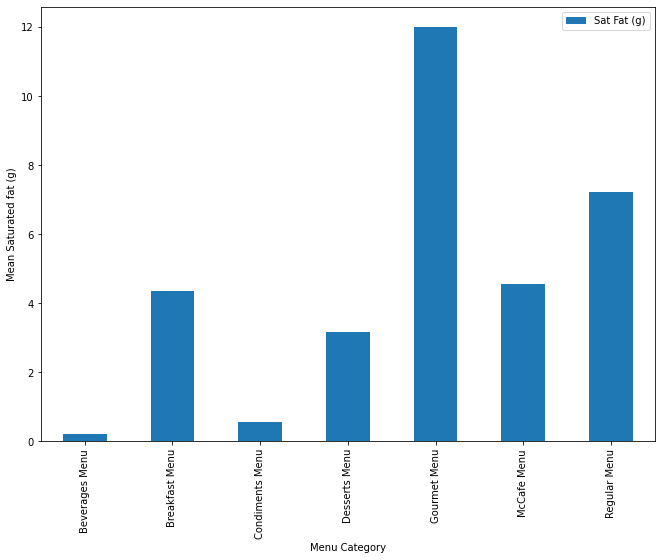

In [40]:
data[['Menu Category', 'Menu Items', 'Sat Fat (g)']].groupby('Menu Category').mean().plot(figsize=(11,8),ylabel='Mean Saturated fat (g)', kind='bar')

From the above observations, we can see that **Gourmet Menu** has the most Saturated Fats (g), followed by **Regular Menu**.

In [41]:
data[['Menu Category', 'Menu Items', 'Sat Fat (g)']].sort_values('Sat Fat (g)', ascending=False).head()

,Menu Category,Menu Items,Sat Fat (g)
110,Gourmet Menu,McSpicy Premium Veg Burger,20.46
3,Regular Menu,Spicy Paneer Wrap,19.73
24,Regular Menu,3 piece Chicken Strips,17.12
2,Regular Menu,McSpicy™ Paneer Burger,17.12
107,Gourmet Menu,Chicken Cheese Lava Burger,17.00


The top 5 foods having the most saturated fats (g) are:
+ McSpicy Premium Veg Burger
+ Spicy Paneer Wrap
+ 3 piece Chicken Strips
+ McSpicy™ Paneer Burger
+ Chicken Cheese Lava Burger

In [42]:
data[['Menu Category','Menu Items', 'Sat Fat (g)']].sort_values('Sat Fat (g)', ascending=True)[data['Sat Fat (g)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Sat Fat (g)
134,Condiments Menu,Chilli Sauce,0.01
140,Condiments Menu,Mixed Fruit Beverage,0.02
46,Breakfast Menu,Americano (S),0.03
44,Breakfast Menu,Espresso,0.03
88,McCafe Menu,Mix Berry Cooler,0.04


The top 5 foods having the least saturated fats (g) are:
+ Chilli Sauce	
+ Mixed Fruit Beverage
+ Americano (S)
+ Espresso
+ Mix Berry Cooler

In [43]:
sat_fat_desc = data[['Menu Category', 'Menu Items', 'Sat Fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Sat Fat (g)', ascending=False).head(5))
sat_fat_desc

,Menu Category,Menu Items,Sat Fat (g)
129,Beverages Menu,Sprite Float,1.28
128,Beverages Menu,Fanta Float,1.28
127,Beverages Menu,Coke Float,1.28
115,Beverages Menu,Small Coca-Cola,0.00
124,Beverages Menu,Small Sprite,0.00
37,Breakfast Menu,Double Cheese McMuffin,8.84
40,Breakfast Menu,Sausage Mc Muffin with egg,8.08
50,Breakfast Menu,Cappuccino (R),7.37
36,Breakfast Menu,Veg McMuffin,7.29
42,Breakfast Menu,Hot Cake with maple syrup,7.11


The top 5 food items having most Saturated Fats (g) of each menu category are:

**Beverages Menu**:
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Double Cheese McMuffin
+ Sausage Mc Muffin with egg
+ Cappuccino (R)
+ Veg McMuffin	
+ Hot Cake with maple syrup

**Condiments Menu**:
+ Cheese Slice	
+ Mustard diping sauce
+ Sweet Corn	
+ BBQ diping sauce	
+ Piri Piri Mix	

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ McSpicy Premium Veg Burger	
+ Chicken Cheese Lava Burger	
+ McSpicy Premium Chicken Burger
+ American Triple Cheese Veg	
+ Cheese Lava Burger

**McCafe Menu**:
+ Chocolate Oreo Frappe		
+ Mocha Frappe
+ Cold Coffee Frappe	
+ American Mud Pie Shake	
+ Flat White (L)	
  
**Regular Menu**:
+ Spicy Paneer Wrap	
+ McSpicy™ Paneer Burger
+ 3 piece Chicken Strips	
+ Veg Maharaja Mac
+ Spicy Chicken Wrap	

In [44]:
sat_fat_asc = data[['Menu Category', 'Menu Items', 'Sat Fat (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Sat Fat (g)', ascending=True).head(5))
sat_fat_asc

,Menu Category,Menu Items,Sat Fat (g)
115,Beverages Menu,Small Coca-Cola,0.00
126,Beverages Menu,Large Sprite,0.00
125,Beverages Menu,Medium Sprite,0.00
124,Beverages Menu,Small Sprite,0.00
130,Beverages Menu,Coke Zero Can,0.00
44,Breakfast Menu,Espresso,0.03
46,Breakfast Menu,Americano (S),0.03
47,Breakfast Menu,Americano (R),0.05
48,Breakfast Menu,Americano (L),0.06
45,Breakfast Menu,Espresso Machiato,1.49


The top 5 food items having least Saturated Fats (g) of each menu category are:

**Beverages Menu**:
+ Sprite Float
+ Fanta Float
+ Coke Float

**Breakfast Menu**:
+ Espresso
+ Americano (S)	
+ Americano (R)
+ Americano (L)
+ Espresso Machiato

**Condiments Menu**:
+ Tomato Ketchup Sachets	
+ Maple Syrup
+ Chilli Sauce	
+ Mixed Fruit Beverage
+ Piri Piri Mix	

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Piri piri Mc Spicy Chicken Burger	
+ Piri piri Mc Spicy Veg Burger	
+ Cheesy Veg Nuggets (6pc)	
+ Chunky Chipotle American Burger Chicken	
+ Cheesy Veg Nuggets (9pc)

**McCafe Menu**:
+ Sweet Lime Beverage	
+ Raw Mango Cooler
+ Mix Berry Cooler		
+ Green Apple Ice Tea	
+ Strawberry Ice Tea		
  
**Regular Menu**:
+ L1 Coffee	
+ 5 piece Chicken Strips
+ L1 Coffee with milk	
+ McSpicy Fried Chicken 1 pc
+ Green Chilli Kebab naan	

# Total Sugars

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Total Sugars (g)'>

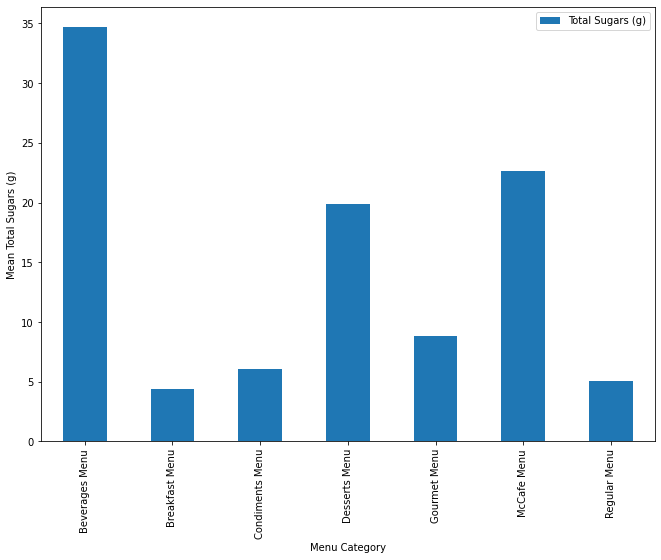

In [45]:
data[['Menu Category', 'Menu Items', 'Total Sugars (g)']].groupby('Menu Category').mean().plot(figsize=(11,8),ylabel='Mean Total Sugars (g)', kind='bar')

From the above observations, we can see that **Beverages Menu** has the most total sugars (g), followed by **McCafe Menu**.

In [46]:
data[['Menu Category', 'Menu Items', 'Total Sugars (g)']].sort_values('Total Sugars (g)', ascending=False).head()

,Menu Category,Menu Items,Total Sugars (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
82,McCafe Menu,Chocolate Oreo Frappe,55.14
117,Beverages Menu,Large Coca-Cola,54.34
91,McCafe Menu,American Mud Pie Shake,53.40


The top 5 foods having the most amount of Total Sugars (g) are:
+ Large Fanta Oragne
+ Large Sprite
+ Chocolate Oreo Frappe
+ Large Coca-Cola
+ American Mud Pie Shake

In [47]:
data[['Menu Category','Menu Items', 'Total Sugars (g)']].sort_values('Total Sugars (g)', ascending=True)[data['Total Sugars (g)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Total Sugars (g)
46,Breakfast Menu,Americano (S),0.13
44,Breakfast Menu,Espresso,0.13
47,Breakfast Menu,Americano (R),0.24
48,Breakfast Menu,Americano (L),0.28
23,Regular Menu,2 piece Chicken Strips,0.29


The top 5 foods having the least amount of Total Sugars (g) are:
+ Americano (S)
+ Espresso
+ Americano (R)
+ Americano (L)	
+ 2 piece Chicken Strips

In [48]:
total_sugars_asc = data[['Menu Category', 'Menu Items', 'Total Sugars (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total Sugars (g)', ascending=True).head(5))
total_sugars_asc

,Menu Category,Menu Items,Total Sugars (g)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.00
121,Beverages Menu,Small Thums-up,24.90
115,Beverages Menu,Small Coca-Cola,27.39
127,Beverages Menu,Coke Float,28.23
44,Breakfast Menu,Espresso,0.13
46,Breakfast Menu,Americano (S),0.13
47,Breakfast Menu,Americano (R),0.24
48,Breakfast Menu,Americano (L),0.28
43,Breakfast Menu,Hash Brown,0.32


The top 5 food items having least Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Vedica Natural Mineral Water
+ Coke Zero Can
+ Small Thums-up
+ Small Coca-Cola
+ Coke Float

**Breakfast Menu**:
+ Espresso
+ Americano (S)	
+ Americano (R)
+ Americano (L)
+ Hash Brown

**Condiments Menu**:
+ Cheese Slice
+ Piri Piri Mix
+ Chilli Sauce
+ Tomato Ketchup Sachets
+ Sweet Corn

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)
+ Cheesy Veg Nuggets (9pc)	
+ McSpicy Premium Chicken Burger
+ McSpicy Premium Veg Burger
+ American Triple Cheese Chicken	

**McCafe Menu**:
+ Moroccon Mint Green Tea (S)		
+ English Breakfast (S)
+ Strawberry Green Tea (S)		
+ Strawberry Green Tea (R)	
+ Moroccon Mint Green Tea (R)	
  
**Regular Menu**:
+ L1 Coffee	
+ 2 piece Chicken Strips 
+ 4 piece Chicken McNuggets
+ Regular Fries	
+ 3 piece Chicken Strips

In [49]:
total_sugars_desc = data[['Menu Category', 'Menu Items', 'Total Sugars (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Total Sugars (g)', ascending=False).head(5))
total_sugars_desc

,Menu Category,Menu Items,Total Sugars (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
117,Beverages Menu,Large Coca-Cola,54.34
123,Beverages Menu,Large Thums-up,49.40
119,Beverages Menu,Medium Fanta Orange,44.72
42,Breakfast Menu,Hot Cake with maple syrup,25.72
50,Breakfast Menu,Cappuccino (R),12.05
49,Breakfast Menu,Cappuccino (S),8.40
36,Breakfast Menu,Veg McMuffin,3.02
38,Breakfast Menu,Spicy Egg McMuffin,2.63


The top 5 food items having least Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Large Fanta Oragne	
+ Large Sprite	
+ Large Coca-Cola	
+ Large Thums-up
+ Medium Fanta Orange

**Breakfast Menu**:
+ Hot Cake with maple syrup	
+ Cappuccino (R)		
+ Cappuccino (S)	
+ Veg McMuffin
+ Spicy Egg McMuffin	

**Condiments Menu**:
+ Mixed Fruit Beverage	
+ Maple Syrup
+ BBQ diping sauce
+ Mustard diping sauce
+ Sweet Corn

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chicken Cheese Lava Burger
+ Cheese Lava Burger	
+ Piri piri Mc Spicy Veg Burger
+ Piri piri Mc Spicy Chicken Burger
+ Chunky Chipotle American Burger Chicken	

**McCafe Menu**:
+ Chocolate Oreo Frappe		
+ American Mud Pie Shake	
+ Medium Blackforest	
+ Hot Chocolate (L)
+ Mocha Frappe		
  
**Regular Menu**:
+ Vanilla Chocochips Muffin	
+ Double Chocochips Muffin	
+ Veg Maharaja Mac	
+ Chicken Maharaja Mac	
+ McSpicy™ Paneer Burger

# Added Sugars (g)

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Added Sugars (g)'>

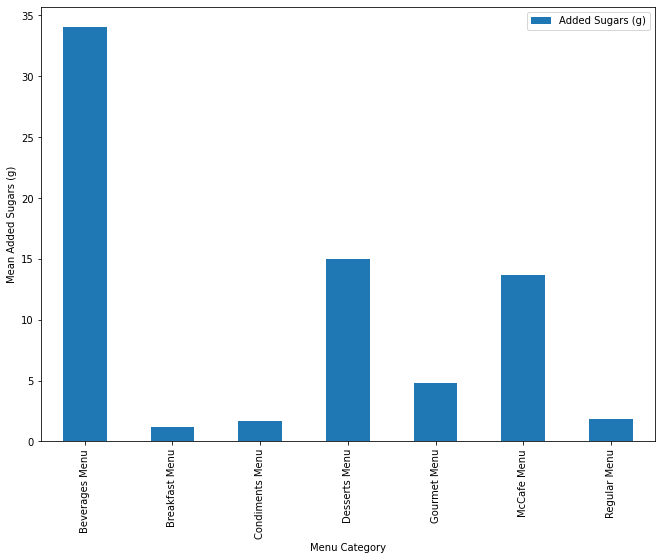

In [50]:
data[['Menu Category', 'Menu Items', 'Added Sugars (g)']].groupby('Menu Category').mean().plot(figsize=(11,8),ylabel='Mean Added Sugars (g)', kind='bar')

From the above observation, we can see that **Beverages Menu** has the most Added Sugars (g), followed by **Desserts Menu**.

In [51]:
data[['Menu Category', 'Menu Items', 'Added Sugars (g)']].sort_values('Added Sugars (g)', ascending=False).head()

,Menu Category,Menu Items,Added Sugars (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
117,Beverages Menu,Large Coca-Cola,54.34
123,Beverages Menu,Large Thums-up,49.40
119,Beverages Menu,Medium Fanta Orange,44.72


The top 5 food items having the most Added Sugars (g) are:
+ Large Fanta Oragne
+ Large Sprite
+ Large Coca-Cola
+ Large Thums-up
+ Medium Fanta Orange

In [52]:
data[['Menu Category','Menu Items', 'Added Sugars (g)']].sort_values('Added Sugars (g)', ascending=True)[data['Added Sugars (g)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Added Sugars (g)
7,Regular Menu,Pizza Puff,0.35
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,0.35
135,Condiments Menu,Piri Piri Mix,0.40
41,Breakfast Menu,Egg McMuffin,0.75
40,Breakfast Menu,Sausage Mc Muffin with egg,0.75


The top 5 food items having the least Added Sugars (g) are:
+ Pizza Puff	
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc	
+ Piri Piri Mix
+ Egg McMuffin
+ Sausage Mc Muffin with egg

In [53]:
added_sugars_desc = data[['Menu Category', 'Menu Items', 'Added Sugars (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Added Sugars (g)', ascending=False).head(5))
added_sugars_desc

,Menu Category,Menu Items,Added Sugars (g)
120,Beverages Menu,Large Fanta Oragne,64.22
126,Beverages Menu,Large Sprite,59.28
117,Beverages Menu,Large Coca-Cola,54.34
123,Beverages Menu,Large Thums-up,49.40
119,Beverages Menu,Medium Fanta Orange,44.72
42,Breakfast Menu,Hot Cake with maple syrup,13.50
38,Breakfast Menu,Spicy Egg McMuffin,1.05
36,Breakfast Menu,Veg McMuffin,0.75
37,Breakfast Menu,Double Cheese McMuffin,0.75
39,Breakfast Menu,Sausage Mc Muffin,0.75


The top 5 food items having most Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Large Fanta Oragne	
+ Large Sprite	
+ Large Coca-Cola	
+ Large Thums-up
+ Medium Fanta Orange

**Breakfast Menu**:
+ Hot Cake with maple syrup	
+ Spicy Egg McMuffin			
+ Veg McMuffin	
+ Double Cheese McMuffin
+ Sausage Mc Muffin	

**Condiments Menu**:
+ Maple Syrup
+ Mustard diping sauce
+ BBQ diping sauce
+ Tomato Ketchup Sachets	
+ Chilli Sauce

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Cheese Lava Burger
+ Chicken Cheese Lava Burger	
+ Piri piri Mc Spicy Veg Burger
+ Chunky Chipotle American Burger Chicken	
+ Piri piri Mc Spicy Chicken Burger	

**McCafe Menu**:
+ Chocolate Oreo Frappe	
+ Mocha Frappe	
+ Medium Blackforest	
+ American Mud Pie Shake	
+ Mixed Berry Smoothie	
  
**Regular Menu**:
+ Veg Maharaja Mac
+ Chicken Maharaja Mac
+ McSpicy™ Paneer Burger
+ American Chicken Burger		
+ American Veg Burger

In [54]:
added_sugars_asc = data[['Menu Category', 'Menu Items', 'Added Sugars (g)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Added Sugars (g)', ascending=True).head(5))
added_sugars_asc

,Menu Category,Menu Items,Added Sugars (g)
131,Beverages Menu,Vedica Natural Mineral Water,0.00
130,Beverages Menu,Coke Zero Can,0.00
127,Beverages Menu,Coke Float,24.54
121,Beverages Menu,Small Thums-up,24.90
129,Beverages Menu,Sprite Float,26.14
43,Breakfast Menu,Hash Brown,0.00
44,Breakfast Menu,Espresso,0.00
45,Breakfast Menu,Espresso Machiato,0.00
46,Breakfast Menu,Americano (S),0.00
47,Breakfast Menu,Americano (R),0.00


The top 5 food items having least Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Vedica Natural Mineral Water
+ Coke Zero Can
+ Coke Float
+ Small Thums-up
+ Sprite Float

**Breakfast Menu**:
+ Hash Brown	
+ Espresso			
+ Espresso Machiato	
+ Americano (S)	
+ Americano (R)

**Condiments Menu**:
+ Cheese Slice	
+ Sweet Corn
+ Mixed Fruit Beverage
+ Piri Piri Mix	
+ Chilli Sauce	

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)	
+ Cheesy Veg Nuggets (9pc)		
+ McSpicy Premium Chicken Burger	
+ McSpicy Premium Veg Burger	
+ American Triple Cheese Chicken

**McCafe Menu**:
+ Cappuccino (L)
+ Strawberry Green Tea (L)	
+ Strawberry Green Tea (R)	
+ Strawberry Green Tea (S)	
+ Moroccon Mint Green Tea (L)
  
**Regular Menu**:
+ Vanilla Chocochips Muffin
+ 9 piece Chicken McNuggets
+ 6 piece Chicken McNuggets	
+ 4 piece Chicken McNuggets			
+ McSpicy Fried Chicken 1 pc	

# Sodium

<AxesSubplot:xlabel='Menu Category', ylabel='Mean Sodium (mg)'>

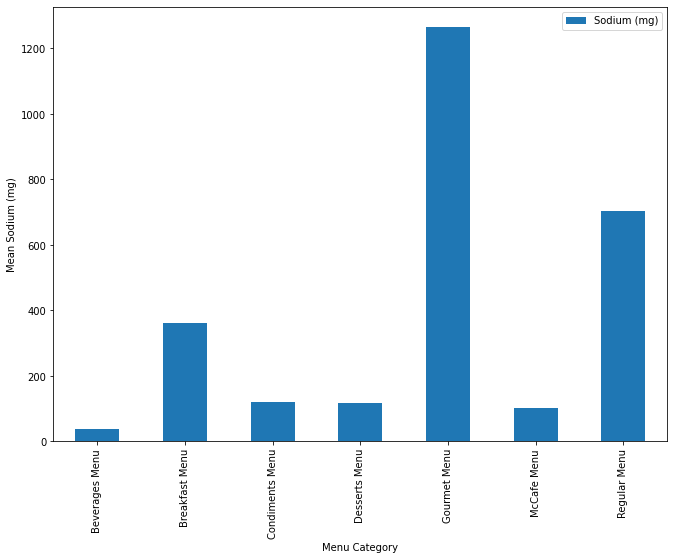

In [55]:
data[['Menu Category', 'Menu Items', 'Sodium (mg)']].groupby('Menu Category').mean().plot(figsize=(11,8),ylabel='Mean Sodium (mg)', kind='bar')

From the above observations, we can see that **Gourmet Menu** has the most sodium (mg), followed by **Regular Menu**.

In [56]:
data[['Menu Category', 'Menu Items', 'Sodium (mg)']].sort_values('Sodium (mg)', ascending=False).head()

,Menu Category,Menu Items,Sodium (mg)
18,Regular Menu,Ghee Rice with Mc Spicy Fried Chicken 1 pc,2399.49
108,Gourmet Menu,Chunky Chipotle American Burger Chicken,1906.27
12,Regular Menu,Chicken Maharaja Mac,1854.71
107,Gourmet Menu,Chicken Cheese Lava Burger,1745.04
109,Gourmet Menu,McSpicy Premium Chicken Burger,1614.88


The top 5 food items, having the most Sodium (mg) are:
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc
+ Chunky Chipotle American Burger Chicken
+ Chicken Maharaja Mac
+ Chicken Cheese Lava Burger
+ McSpicy Premium Chicken Burger

In [57]:
data[['Menu Category','Menu Items', 'Sodium (mg)']].sort_values('Sodium (mg)', ascending=True)[data['Sodium (mg)']>0.0].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Menu Category,Menu Items,Sodium (mg)
139,Condiments Menu,Sweet Corn,0.04
44,Breakfast Menu,Espresso,0.32
46,Breakfast Menu,Americano (S),0.32
47,Breakfast Menu,Americano (R),0.57
48,Breakfast Menu,Americano (L),0.65


The top 5 food items, having the least Sodium (mg) are:
+ Sweet Corn	
+ Espresso
+ Americano (S)
+ Americano (R)
+ Americano (L)

In [58]:
sodium_asc = data[['Menu Category', 'Menu Items', 'Sodium (mg)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Sodium (mg)', ascending=True).head(5))
sodium_asc

,Menu Category,Menu Items,Sodium (mg)
124,Beverages Menu,Small Sprite,2.02
125,Beverages Menu,Medium Sprite,2.79
131,Beverages Menu,Vedica Natural Mineral Water,2.90
126,Beverages Menu,Large Sprite,4.00
115,Beverages Menu,Small Coca-Cola,21.17
44,Breakfast Menu,Espresso,0.32
46,Breakfast Menu,Americano (S),0.32
47,Breakfast Menu,Americano (R),0.57
48,Breakfast Menu,Americano (L),0.65
45,Breakfast Menu,Espresso Machiato,26.05


The top 5 food items having least Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Small Sprite	
+ Medium Sprite
+ Vedica Natural Mineral Water
+ Large Sprite
+ Small Coca-Cola

**Breakfast Menu**:
+ Espresso
+ Americano (S)		
+ Americano (R)
+ Americano (L)	
+ Espresso Machiato

**Condiments Menu**:
+ Sweet Corn
+ Mixed Fruit Beverage
+ Maple Syrup
+ Chilli Sauce	
+ Tomato Ketchup Sachets

**Desserts Menu**:
+ Small McFlurry - Oreo
+ Regular McFlurry - Oreo

**Gourmet Menu**:
+ Cheesy Veg Nuggets (6pc)	
+ Cheesy Veg Nuggets (9pc)		
+ Cheese Lava Burger	
+ Piri piri Mc Spicy Veg Burger	
+ American Triple Cheese Chicken

**McCafe Menu**:
+ Green Apple Ice Tea
+ Strawberry Ice Tea	
+ Lemon Ice Tea	
+ English Breakfast (S)	
+ Strawberry Green Tea (S)
  
**Regular Menu**:
+ L1 Coffee	
+ L1 Coffee with milk
+ Regular Fries	
+ Medium Fries			
+ Vanilla Chocochips Muffin	

In [59]:
sodium_desc = data[['Menu Category', 'Menu Items', 'Sodium (mg)']].groupby('Menu Category', group_keys=False).apply(lambda x: x.sort_values('Sodium (mg)', ascending=False).head(5))
sodium_desc

,Menu Category,Menu Items,Sodium (mg)
120,Beverages Menu,Large Fanta Oragne,110.16
119,Beverages Menu,Medium Fanta Orange,76.71
128,Beverages Menu,Fanta Float,66.61
118,Beverages Menu,Small Fanta Oragne,55.53
123,Beverages Menu,Large Thums-up,49.89
36,Breakfast Menu,Veg McMuffin,804.63
40,Breakfast Menu,Sausage Mc Muffin with egg,804.04
38,Breakfast Menu,Spicy Egg McMuffin,773.60
39,Breakfast Menu,Sausage Mc Muffin,742.60
37,Breakfast Menu,Double Cheese McMuffin,622.95


The top 5 food items having most Total Sugars (g) of each menu category are:

**Beverages Menu**:
+ Large Fanta Oragne	
+ Medium Fanta Orange
+ Fanta Float
+ Small Fanta Oragne
+ Large Thums-up

**Breakfast Menu**:
+ Veg McMuffin	
+ Sausage Mc Muffin with egg		
+ Spicy Egg McMuffin
+ Sausage Mc Muffin
+ Double Cheese McMuffin

**Condiments Menu**:
+ Piri Piri Mix
+ Mustard diping sauce
+ Cheese Slice
+ BBQ diping sauce	
+ Tomato Ketchup Sachets

**Desserts Menu**:
+ Regular McFlurry - Oreo
+ Small McFlurry - Oreo

**Gourmet Menu**:
+ Chunky Chipotle American Burger Chicken
+ Chicken Cheese Lava Burger
+ McSpicy Premium Chicken Burger	
+ McSpicy Premium Veg Burger
+ American Triple Cheese Chicken

**McCafe Menu**:
+ Chocolate Oreo Frappe
+ Hot Chocolate (L)	
+ Mocha Frappe	
+ Mocha (L)	
+ Hot Chocolate (R)
  
**Regular Menu**:
+ Ghee Rice with Mc Spicy Fried Chicken 1 pc	
+ Chicken Maharaja Mac
+ Veg Maharaja Mac	
+ 5 piece Chicken Strips	
+ Spicy Chicken Wrap

# Get the best and worst healthy food

Nutrients and their values to check for in a healthy food:
+ More Energy (kCal)
+ More Protein
+ More Carbs
+ Less Total fat
+ Less Saturated Fat
+ Less Trans fat
+ Less Cholesterol
+ Less Total Sugars
+ Less Added Sugars
+ Less Sodium

*We prioritize having less bad nutrients over having more good nutrients in case of trade off*

## Beverages Menu

In [60]:
data[data['Menu Category']=='Beverages Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Energy (kCal)'], ascending=[True, True, False]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
130,Beverages Menu,Coke Zero Can,330.0,0.99,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,24.75
131,Beverages Menu,Vedica Natural Mineral Water,500.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,2.90
121,Beverages Menu,Small Thums-up,299.0,99.60,0.0,0.0,0.0,0.0,0.0,24.90,24.90,24.90,25.15
115,Beverages Menu,Small Coca-Cola,299.0,109.56,0.0,0.0,0.0,0.0,0.0,27.39,27.39,27.39,21.17
124,Beverages Menu,Small Sprite,299.0,119.52,0.0,0.0,0.0,0.0,0.0,29.88,29.88,29.88,2.02


Since the **Beverages** don't have most of the nutrients, we check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Energy (kCal)**

The top 5 healthiest **Beverages** are:
+ Coke Zero Can	
+ Vedica Natural Mineral Water	
+ Small Thums-up	
+ Small Coca-Cola	
+ Small Sprite	

## Breakfast Menu

In [61]:
data[data['Menu Category']=='Breakfast Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)'], ascending=[True, True, True,False, False]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
44,Breakfast Menu,Espresso,26.5,12.87,0.52,0.03,0.03,0.03,0.27,2.55,0.13,0.0,0.32
46,Breakfast Menu,Americano (S),276.5,12.87,0.52,0.03,0.03,0.03,0.27,2.55,0.13,0.0,0.32
47,Breakfast Menu,Americano (R),347.5,23.07,0.94,0.05,0.05,0.05,0.48,4.57,0.24,0.0,0.57
48,Breakfast Menu,Americano (L),455.0,26.71,1.09,0.06,0.06,0.06,0.55,5.30,0.28,0.0,0.65
45,Breakfast Menu,Espresso Machiato,76.5,44.98,2.09,2.02,1.49,0.08,6.27,4.97,2.50,0.0,26.05


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**

The top 5 healthiest **Breakfast** are:
+ Espresso
+ Americano (S)	
+ Americano (R)	
+ Americano (L)		
+ Espresso Machiato		

## Condiments Menu

In [62]:
data[data['Menu Category']=='Condiments Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)', 'Sodium (mg)'], ascending=[True, True, True,False, False, True]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
137,Condiments Menu,Maple Syrup,30.0,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00
134,Condiments Menu,Chilli Sauce,10.0,8.07,0.03,0.01,0.01,0.01,0.10,1.99,1.53,1.34,65.24
140,Condiments Menu,Mixed Fruit Beverage,180.0,72.25,0.65,0.02,0.02,0.02,0.01,18.00,16.83,0.00,10.80
135,Condiments Menu,Piri Piri Mix,5.0,17.13,0.51,0.36,0.08,0.01,0.05,2.50,0.66,0.40,414.71
133,Condiments Menu,BBQ diping sauce,25.0,54.89,0.26,0.49,0.15,0.04,0.25,12.36,7.65,2.50,113.23


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**

The top 5 healthiest **Condiments** are:
+ Maple Syrup	
+ Chilli Sauce	
+ Mixed Fruit Beverage		
+ Piri Piri Mix			
+ BBQ diping sauce	

## Desserts Menu

In [63]:
data[data['Menu Category']=='Desserts Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)'], ascending=[True, True, True,False, False]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
102,Desserts Menu,Small McFlurry - Oreo,86.79,116.36,2.05,3.70,2.25,0.07,4.8,18.69,14.49,10.80,80.73
103,Desserts Menu,Regular McFlurry - Oreo,147.38,209.39,3.58,6.81,4.07,0.12,8.0,33.42,25.35,19.23,150.90


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**

The top 2 healthiest **Desserts** are:
+ Small McFlurry - Oreo		
+ Regular McFlurry - Oreo		

## Gourmet Menu

In [64]:
data[data['Menu Category']=='Gourmet Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)', 'Sodium (mg)'], ascending=[True, True, True,False, False, True]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
113,Gourmet Menu,Cheesy Veg Nuggets (6pc),90.0,252.29,8.48,13.09,7.53,0.09,20.03,23.60,1.31,0.00,428.17
111,Gourmet Menu,Piri piri Mc Spicy Chicken Burger,228.0,443.40,25.63,17.30,4.01,0.19,64.19,43.29,9.29,6.32,1229.86
114,Gourmet Menu,Cheesy Veg Nuggets (9pc),135.0,378.43,12.72,19.63,11.30,0.14,30.05,35.40,1.96,0.00,642.25
104,Gourmet Menu,American Triple Cheese Chicken,195.0,457.94,24.43,22.65,11.56,0.17,71.23,37.45,7.64,3.84,1396.17
105,Gourmet Menu,American Triple Cheese Veg,207.0,524.69,19.54,23.16,14.78,0.19,48.74,56.24,7.90,3.84,1174.27


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**, **Sodium (mg)**

The top 5 healthiest **Gourmet** are:
+ Cheesy Veg Nuggets (6pc)	
+ Piri piri Mc Spicy Chicken Burger	
+ Cheesy Veg Nuggets (9pc)	
+ American Triple Cheese Chicken			
+ American Triple Cheese Veg

## McCafe Menu

In [65]:
data[data['Menu Category']=='McCafe Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)', 'Sodium (mg)'], ascending=[True, True, True,False, False, True]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
87,McCafe Menu,Raw Mango Cooler,310.0,102.38,0.14,0.04,0.04,0.04,0.40,25.18,21.06,19.28,102.68
88,McCafe Menu,Mix Berry Cooler,310.0,103.85,0.16,0.04,0.04,0.04,0.40,25.56,21.25,20.52,23.82
89,McCafe Menu,Sweet Lime Beverage,310.0,128.21,0.07,0.08,0.00,0.00,0.00,31.72,28.72,28.08,66.20
78,McCafe Menu,Green Apple Ice Tea,236.5,94.94,0.24,0.16,0.16,0.16,1.57,24.17,20.75,19.94,9.61
77,McCafe Menu,Strawberry Ice Tea,236.5,94.95,0.24,0.16,0.16,0.16,1.57,24.17,21.10,20.27,9.72


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**, **Sodium (mg)**

The top 5 healthiest **McCafe** are:
+ Raw Mango Cooler
+ Mix Berry Cooler
+ Sweet Lime Beverage	
+ Green Apple Ice Tea			
+ Strawberry Ice Tea	

## Regular Menu

In [66]:
data[data['Menu Category']=='Regular Menu'].sort_values(['Total fat (g)', 'Total Sugars (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)', 'Sodium (mg)'], ascending=[True, True, True,False, False, True]).head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
32,Regular Menu,L1 Coffee,200.0,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00
33,Regular Menu,L1 Coffee with milk,205.0,35.80,1.00,2.00,1.20,0.08,6.00,1.60,3.45,0.00,14.00
29,Regular Menu,Regular Wedges,114.0,204.65,3.97,7.15,3.39,0.10,0.97,28.74,0.48,0.00,356.44
15,Regular Menu,Green Chilli Kebab naan,138.0,230.95,5.67,9.32,3.27,0.19,8.74,31.06,3.64,1.15,410.78
20,Regular Menu,4 piece Chicken McNuggets,64.0,169.68,10.03,9.54,4.45,0.06,24.66,10.50,0.32,0.00,313.25


We check on the following columns: **Total fat (g)**, **Total Sugars (g)**, **Cholesterols (mg)**, **Protein (g)**, **Energy (kCal)**, **Sodium (mg)**

The top 5 healthiest **Regular** are:
+ L1 Coffee
+ L1 Coffee with milk	
+ Regular Wedges	
+ Green Chilli Kebab naan			
+ 4 piece Chicken McNuggets

## Most healthy foods

In [67]:
data.sort_values(['Total Sugars (g)', 'Trans fat (g)', 'Sat Fat (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)','Total carbohydrate (g)', 'Sodium (mg)'], ascending=[True, True, True, True,False, False, False, True]).head(20)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
32,Regular Menu,L1 Coffee,200.0,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.0,0.00
130,Beverages Menu,Coke Zero Can,330.0,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,24.75
131,Beverages Menu,Vedica Natural Mineral Water,500.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2.90
44,Breakfast Menu,Espresso,26.5,12.87,0.52,0.03,0.03,0.03,0.27,2.55,0.13,0.0,0.32
46,Breakfast Menu,Americano (S),276.5,12.87,0.52,0.03,0.03,0.03,0.27,2.55,0.13,0.0,0.32
47,Breakfast Menu,Americano (R),347.5,23.07,0.94,0.05,0.05,0.05,0.48,4.57,0.24,0.0,0.57
48,Breakfast Menu,Americano (L),455.0,26.71,1.09,0.06,0.06,0.06,0.55,5.30,0.28,0.0,0.65
23,Regular Menu,2 piece Chicken Strips,58.0,164.44,10.17,12.38,11.41,0.06,30.10,2.68,0.29,0.0,477.22
43,Breakfast Menu,Hash Brown,64.0,140.29,1.93,7.32,3.42,0.06,0.64,15.63,0.32,0.0,275.26
20,Regular Menu,4 piece Chicken McNuggets,64.0,169.68,10.03,9.54,4.45,0.06,24.66,10.50,0.32,0.0,313.25


As we can see, the healthiest food is always the coffee for devs😉 (just kidding!)

Filters (*priotized based on ordering*): 'Total Sugars (g)', 'Trans fat (g)', 'Sat Fat (g)', 'Cholesterols (mg)','Protein (g)', 'Energy (kCal)','Total carbohydrate (g)', 'Sodium (mg)'

The healthiest food (non-beverage) overall are:
+ 2 piece Chicken Strips (Regular Menu)
+ Hash Brown (Breakfast Menu)
+ 4 piece Chicken McNuggets	

The healthiest food (beverage) overall are:
+ L1 Coffee
+ Coke Zero Can
+ Vedica Natural Mineral Water
+ Espresso

## Least Healthy Foods

In [68]:
data.sort_values(['Trans fat (g)', 'Sat Fat (g)', 'Total Sugars (g)','Cholesterols (mg)', 'Sodium (mg)'], ascending=[False,False,False,False,False]).head(20)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
25,Regular Menu,5 piece Chicken Strips,145.0,411.09,25.43,28.54,0.15,75.26,6.70,0.73,0.72,0.00,1193.05
132,Condiments Menu,Mustard diping sauce,25.0,81.18,0.52,5.57,1.78,0.47,0.29,7.24,6.66,4.00,221.32
72,McCafe Menu,Moroccon Mint Green Tea (L),456.0,10.21,0.55,0.46,0.46,0.46,4.56,4.56,2.28,0.00,24.44
75,McCafe Menu,Strawberry Green Tea (L),456.0,11.49,0.78,0.46,0.46,0.46,4.56,4.56,2.28,0.00,23.76
69,McCafe Menu,English Breakfast (L),456.0,16.23,0.91,0.46,0.46,0.46,4.56,0.46,2.28,0.00,22.62
64,McCafe Menu,Hot Chocolate (L),367.0,383.29,11.01,12.84,9.09,0.43,36.67,58.43,47.96,24.41,273.35
57,McCafe Menu,Flat White (L),405.0,251.47,12.08,14.02,10.31,0.41,42.55,22.22,16.81,0.00,180.80
60,McCafe Menu,Mocha (L),377.0,302.02,10.88,12.01,8.67,0.41,35.67,40.04,29.96,12.16,209.09
54,McCafe Menu,Latte (L),375.0,232.20,11.14,12.82,9.43,0.38,38.95,20.77,15.40,0.00,165.36
51,McCafe Menu,Cappuccino (L),355.0,219.36,10.51,12.03,8.85,0.36,36.55,19.81,14.45,0.00,155.06


Filters (*priotized based on ordering*): 'Trans fat (g)', 'Sat Fat (g)', 'Cholesterols (mg)', 'Sodium (mg)'

The non-healthiest food (non-beverage and non-condiments) overall are:
+ 5 piece Chicken Strips (Regular Menu)
+ Mustard diping sauce (Condiments Menu)
+ English Breakfast (L) (McCafe Menu) 
+ Hot Cake with maple syrup	(Breakfast Menu)

The healthiest food (beverage and condiments) overall are:
+ Mustard diping sauce
+ Moroccon Mint Green Tea (L)	
+ Strawberry Green Tea (L)
+ English Breakfast (L) (McCafe Menu) 

# Some points to be noted
+ Some Menu Items are wrongly classified or misrepresented, like for example English Breakfast in McCafe Menu has (L), (R), and therefore hard to say it's a beverage or non-beverage.
+ The relation between Total fat (g) and Sat fat (g) and Trans fat (g) is not properly represented.
+ The Trans fat (g) data in 5 piece Chicken Strips should be verified as it is an outlier.
+ You cannot expect to have healthy food in a fast-food outlet like McDonald's (just my opinion!).
+ I'm no nutritionist, just another data analyst, so all the results should be verified by a professional before coming to any real-life conclusions. 